In [ ]:
#| default_exp subspaces

# Subspaces

> **Summary**: Vectors are 1D. Bivectors are 2D. Trivectors are 3D. n-vectors are nD. In general, these entities are called "blades". Basis Blades are basis n-vectors constructed with the wedge ($\wedge$) product.

In [ ]:
#| export
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#| hide
%matplotlib inline

In [ ]:
plt.style.use('seaborn')

## Vectors are 1-Dimensional

Vectors represent lines, or 1D subspaces. Despite this, in Linear Algebra vectors are used to represent planes, albeit in an awkward way. Since vectors don't have enough dimensions to represent a plane, we construct normal vectors to represent them.

Instead, why not just have 2D vectors? Seems simple, but how do you construct 2D vectors?
First, consider the opposite case of constructing a lower dimensional subspace. The dot product is an operator that takes two vectors and returns a scalar. Numerically, this is just a sum of the products of corresponding elements of each vector:

For example, if we have $v_1 = [5, 12]$, and $v_2 = [-6, 8]$, the dot product is: $v_1 \cdot v_2 = (5)(-6) + (12)(8) = 66$

In [ ]:
vec1 = np.array([5., 12.])
vec2 = np.array([-6., 8.])
np.dot(vec1, vec2)

66.0

But geometrically, you can interpret the dot product as the length of $v_1$ multiplied by the length of the projection of $v_2$ onto $v_1$:

In [ ]:
#| export
def calc_projection_vector(vec1: np.ndarray, vec2: np.ndarray) -> np.ndarray:
    """Calculate the projection vector of vec1 onto vec2"""
    vec2_magnitude = np.linalg.norm(vec2) 
    projection_magnitude = (np.dot(vec1, vec2) / vec2_magnitude)
    projection_direction = vec2 / vec2_magnitude
    projection_vec = projection_magnitude * projection_direction
    return projection_vec

In [ ]:
def calc_projection_vector(vec1: np.ndarray, vec2: np.ndarray) -> np.ndarray:
    """Calculate the projection vector of vec1 onto vec2"""
    vec2_magnitude = np.linalg.norm(vec2) 
    projection_magnitude = (np.dot(vec1, vec2) / vec2_magnitude)
    projection_direction = vec2 / vec2_magnitude
    projection_vec = projection_magnitude * projection_direction
    return projection_vec

In [ ]:
#| export
def plot_dot_product(vec1: np.ndarray, vec2: np.ndarray) -> plt.Figure:
    """Visualize the dot product"""
    fig, ax = plt.subplots(1, 1)
    origin = np.array([0, 0])
    colors = ('r', 'b')
    for color, vec in zip(colors, (vec1, vec2)):
        ax.quiver(*origin, *vec, scale=1, scale_units='xy', width=0.01, color=[color],
            label=f'len={round(np.linalg.norm(vec), 2)}'
        )
    try:
        projected_vector = calc_projection_vector(vec1, vec2)
        ax.quiver(*origin, *projected_vector, scale=1, scale_units='xy', width=0.01, color=['g'], 
            label=f'len={round(np.linalg.norm(projected_vector), 2)}'
        )
        projection_line = np.array([projected_vector, vec1]).T
        ax.plot(*projection_line)
        
    except ZeroDivisionError as zerr:
        print('Encountered zero division! Cannot plot projected vector')
    ax.set_title(f'Projection Vectors (Dot Product={np.dot(vec1, vec2)})')
    ax.set_aspect('equal')
    ax.set_xlim([-10., 10])
    return fig

In [ ]:
def plot_dot_product(vec1: np.ndarray, vec2: np.ndarray) -> plt.Figure:
    """Visualize the dot product"""
    fig, ax = plt.subplots(1, 1)
    origin = np.array([0, 0])
    colors = ('r', 'b')
    for color, vec in zip(colors, (vec1, vec2)):
        ax.quiver(*origin, *vec, scale=1, scale_units='xy', width=0.01, color=[color],
            label=f'len={round(np.linalg.norm(vec), 2)}'
        )
    try:
        projected_vector = calc_projection_vector(vec1, vec2)
        ax.quiver(*origin, *projected_vector, scale=1, scale_units='xy', width=0.01, color=['g'], 
            label=f'len={round(np.linalg.norm(projected_vector), 2)}'
        )
        projection_line = np.array([projected_vector, vec1]).T
        ax.plot(*projection_line)
    except ZeroDivisionError as zerr:
        print('Encountered zero division! Cannot plot projected vector')
    ax.set_title(f'Projection Vectors (Dot Product={np.dot(vec1, vec2)})')
    ax.set_aspect('equal')
    ax.set_xlim([-10., 10])
    return fig

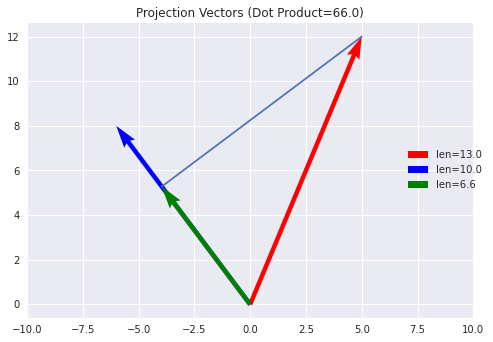

In [ ]:
fig = plot_dot_product(vec1, vec2)
plt.legend(bbox_to_anchor=(1.04, 0.6))
plt.show()

Lowering the dimensionality of the subspace has to do with projection. To get a higher dimensional subspace, we need to do the opposite of projection, i.e extension.

## Bivectors

We can construct a 2D object by extending the two vectors into a parallelogram. This new 2D object is called a bivector, or a 2-vector. In math notation we write $a \wedge b$.

Alternatively, we can decompose $a$ and $b$ into each orthogonal (perpendicular) basis. This is exactly like splitting a vector into it's $x$ and $y$ components, although in the geometric algebra literature it's common to refer to the bases as $e_1$ and $e_2$.

For example, $a = \alpha_1 e_1 + \alpha_2 e_2$ and $b = \beta_1 e_1 + \beta_2 e_2$, where the greek letters are scalars. You can see the full derivation in the [Geometric Algebra Primer (Chapter 2.1.1)](http://www.jaapsuter.com/geometric-algebra.pdf), but know that $a \wedge b = (\alpha_1 \beta_2 - \alpha_2 \beta_1) e_1 \wedge e_2$.

[Notice anything about $(\alpha_1 \beta_2 - \alpha_2 \beta_1) e_1 \wedge e_2$? The scalar factor is the determinant of a $2\times 2$ matrix. The value corresponds to the area of a parallelogram created by the vectors $a$ and $b$.]{.aside}

> Note that people tend to abbreviate $e_1 \wedge e_2$ as $e_{12}$.

{{< pagebreak >}}


In [ ]:
#| export
def plot_bivector(vec1: np.ndarray, vec2: np.ndarray) -> plt.Figure:
    """Plot a bivector given two vectors"""
    origin = np.array([0., 0.])
    vectors = (vec1, vec2, -vec1, -vec2)
    colors = ('r', 'g', 'b', 'y')
    fig, ax = plt.subplots(1, 1)
    for color, vec in zip(colors, vectors):
        ax.quiver(*origin, *vec, scale=1, scale_units='xy', width=0.02, color=[color])
        origin += vec
    ax.set_title('Bivector')
    ax.set_aspect('equal')
    return fig

In [ ]:
def plot_bivector(vec1: np.ndarray, vec2: np.ndarray) -> plt.Figure:
    """Plot a bivector given two vectors"""
    origin = np.array([0., 0.])
    vectors = (vec1, vec2, -vec1, -vec2)
    colors = ('r', 'g', 'b', 'y')
    fig, ax = plt.subplots(1, 1)
    for color, vec in zip(colors, vectors):
        ax.quiver(*origin, *vec, scale=1, scale_units='xy', width=0.02, color=[color])
        origin += vec
    ax.set_title('Bivector')
    ax.set_aspect('equal')
    return fig

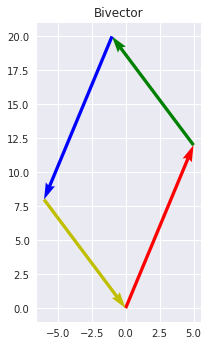

In [ ]:
fig = plot_bivector(vec1, vec2)
plt.show()

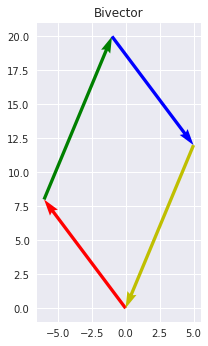

In [ ]:
# A bivector with the same magnitude, but opposite orientation
fig = plot_bivector(vec2, vec1)
plt.show()

Notice that orientation matters! We use positive and negative signs to denote orientation, so $a \wedge b = - b \wedge a$

We aren't just restricted to bivectors. There are many vectors of arbitrary dimension, which we call **blades**:

* Scalars are 0-blades 
    * 2, 42, $\tau$, 13.6, $\pi$, etc
* The vectors we are used to from Linear Algebra are 1-blades 
    * $v = 102e_1 + 4e_2 + 69e_3 - 30e_4$
* Bivectors are 2-blades
    * $A = 420 e_1 \wedge e_2$ ('A' for area)
* Trivectors are 3-blades
    * $V = -256 e_1 \wedge e_2 \wedge e_3$ ('v' for volume)
* k-vectors are k-blades
    * $C = 1.618 e_1 \wedge e_2 \wedge ... \wedge e_k$ (no reason for 'C')

The number in front of the word blade, like 2 or $k$, is the **grade** of the blade.

> Note that you can have a k-dimensional blade existing in a n-dimensional space, as long as $k \leq n$. 

## Readings

Geometric Algebra Primer (Suter, 2003)

* Chapter 2 Introduction
* Chapter 2.1 Bivectors
* Chapter 2.3 Blades

## What's Next?

Next, we look at representing basis blades on a computer.